In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
%matplotlib inline

import os
print(os.listdir("../input"))

data = pd.read_csv('../input/80-cereals/cereal.csv')

['5day-data-challenge-signup-survey-responses', '80-cereals']


### Examine the data and plot a histogram

In [16]:
print(data.shape)
data.info()

(77, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 16 columns):
name        77 non-null object
mfr         77 non-null object
type        77 non-null object
calories    77 non-null int64
protein     77 non-null int64
fat         77 non-null int64
sodium      77 non-null int64
fiber       77 non-null float64
carbo       77 non-null float64
sugars      77 non-null int64
potass      77 non-null int64
vitamins    77 non-null int64
shelf       77 non-null int64
weight      77 non-null float64
cups        77 non-null float64
rating      77 non-null float64
dtypes: float64(5), int64(8), object(3)
memory usage: 9.7+ KB


In [17]:
data.head()

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843


Text(0.5,1,'Overview of different nutrients in common cereal brands')

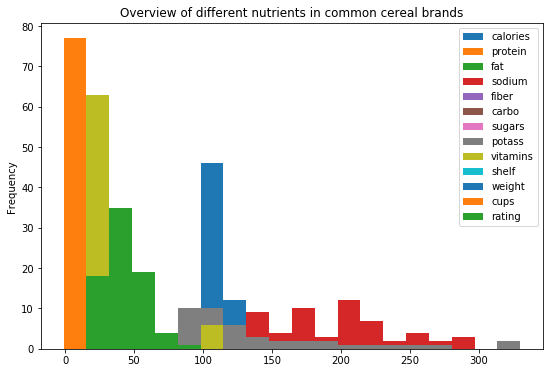

In [18]:
data.plot(kind='hist', bins=20, figsize=(9,6));
plt.title('Overview of different nutrients in common cereal brands')

Text(0.5,1,'Plot for Sodium')

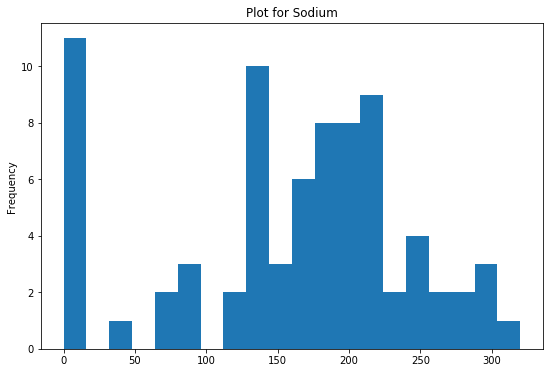

In [19]:
data.sodium.plot(kind='hist', bins=20, figsize=(9,6));
plt.title('Plot for Sodium')

### Perform a T-Test

Perform a **t-test**. A t-test is a statistical test that can help us estimate whether the difference in a numerical measure between two groups is reliable.

**Note**:
You can do a t-test with only one sample, but you need to know what you’d expect the mean and standard deviation of the group you sampled it from to be.
If you want to compare more than two groups, you can use an extension of a t-test called an “Analysis of Variance” or “ANOVA”.

A t-test will return a p-value. If a p-value is very low (generally below 0.01) this is evidence that it’s unlikely that we would have drawn our second sample from the same distribution as the first just by chance.

In [20]:
# to do a t-test we need some additional libraries
from scipy.stats import ttest_ind # just the t-test from scipy.stats
from scipy.stats import probplot # for a qqplot, also matplotlib
import pylab

We should make sure that the variable is normally distributed,  so let's use a **qq-polt** to do that. We'll plot a **qqplot** to check normality. If the varaible is normally distributed, most of the points should be along the center diagonal.

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

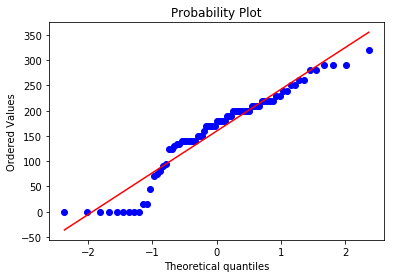

In [21]:
probplot(data["sodium"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

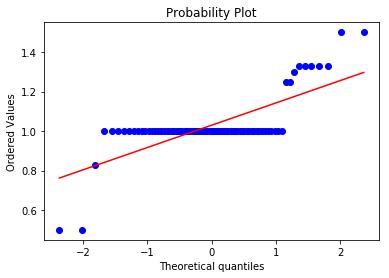

In [22]:
probplot(data["weight"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

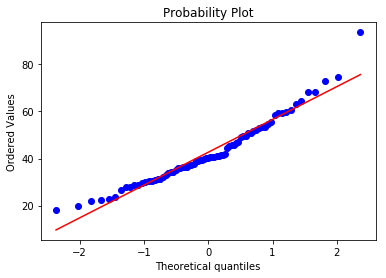

In [23]:
probplot(data["rating"], dist="norm", plot=pylab)

((array([-2.3672044 , -2.01892399, -1.81615497, -1.6685929 , -1.55038319,
         -1.45056491, -1.36341252, -1.28553894, -1.2147656 , -1.14960406,
         -1.08898961, -1.03213271, -0.97843053, -0.92741151, -0.87869918,
         -0.8319877 , -0.78702477, -0.74359942, -0.70153318, -0.66067335,
         -0.62088802, -0.5820622 , -0.54409476, -0.50689606, -0.47038604,
         -0.43449267, -0.39915065, -0.36430042, -0.32988724, -0.29586046,
         -0.26217291, -0.22878038, -0.19564108, -0.16271532, -0.12996506,
         -0.09735365, -0.06484548, -0.0324057 ,  0.        ,  0.0324057 ,
          0.06484548,  0.09735365,  0.12996506,  0.16271532,  0.19564108,
          0.22878038,  0.26217291,  0.29586046,  0.32988724,  0.36430042,
          0.39915065,  0.43449267,  0.47038604,  0.50689606,  0.54409476,
          0.5820622 ,  0.62088802,  0.66067335,  0.70153318,  0.74359942,
          0.78702477,  0.8319877 ,  0.87869918,  0.92741151,  0.97843053,
          1.03213271,  1.08898961,  1.

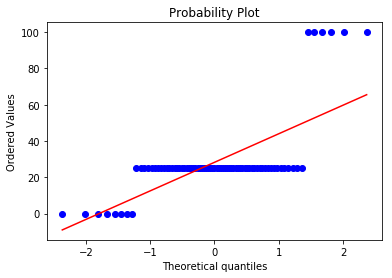

In [24]:
probplot(data["vitamins"], dist="norm", plot=pylab)

Perform the t-test

In [25]:
# get sodium values for cereals set as 'hot'
hc = data.sodium[data['type'] == 'H']
print(hc)

20    80
43     0
57     0
Name: sodium, dtype: int64


In [26]:
# get the sodium values for 'C' cereals
cc = data.sodium[data['type'] == 'C']
print(cc)

0     130
1      15
2     260
3     140
4     200
5     180
6     125
7     210
8     200
9     210
10    220
11    290
12    210
13    140
14    180
15    280
16    290
17     90
18    180
19    140
21    220
22    140
23    190
24    125
25    200
26      0
27    160
28    240
29    135
30     45
     ... 
46    150
47    220
48    190
49    220
50    170
51    170
52    200
53    320
54      0
55      0
56    135
58    210
59    140
60      0
61    240
62    290
63      0
64      0
65      0
66     70
67    230
68     15
69    200
70    190
71    200
72    250
73    140
74    230
75    200
76    200
Name: sodium, Length: 74, dtype: int64


In [27]:
# perform the t-test
ttest_ind(hc, cc, equal_var=False)

Ttest_indResult(statistic=-4.896357618932593, pvalue=0.02411482081945822)

So, if we decided to set our alpha (the highest p-value that would still allow us to reject the null) to 0.05 before we started, we would reject the null (i.e. can be pretty sure that there's not a difference between these two groups). Statistic is the actual value of the t-test, and the pvalue is the probability that we saw a difference this large between our two groups just due to chance if they were actually drawn from the same underlying population.

In [28]:
# let's look at the means (averages) of each group to see which is larger
print("Mean sodium for the hot cereals:")
print(hc.mean())

print("Mean sodium for the cold cereals:")
print(cc.mean())

Mean sodium for the hot cereals:
26.666666666666668
Mean sodium for the cold cereals:
165.06756756756758


Plotting the two cereal types

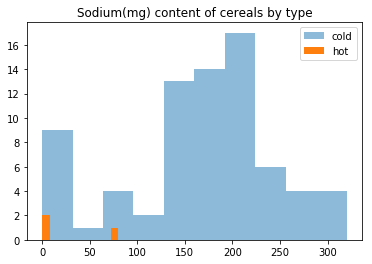

In [29]:
# plot the cold cereals
plt.hist(cc, alpha=0.5, label='cold')
# and the hot cereals
plt.hist(hc, label='hot')
# and add a legend
plt.legend(loc='upper right')
# add a title
plt.title("Sodium(mg) content of cereals by type");

## Analysing Categorical Data

### Visualize categorical data

Categorical data is a statistical data type consisting of categorical variables - a variable that can take on one of a limited number of possible values. Each value(or observation) is assigned to a group or category on the basis of some qualitative property, e.g. t-shirt size, dog breed, etc.

We’re going to visualize categorical data using a bar chart. Ech category is represented by different bar, the height of which indicates the number of items in that category.

In [30]:
import pandas as pd
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
print(os.listdir("../input"))

# read in our data
df = pd.read_csv('../input/5day-data-challenge-signup-survey-responses/anonymous-survey-responses.csv')
# look at the first few rows
df.head()


['5day-data-challenge-signup-survey-responses', '80-cereals']


,Have you ever taken a course in statistics?,Do you have any previous experience with programming?,What's your interest in data science?,"Just for fun, do you prefer dogs or cat?"
0,Yep,Nope,I want to get a job where I use data science,Cats ?±
1,Yep,I have quite a bit of experience,I want to get a job where I use data science,Dogs ?¶
2,Yep,I have a little bit of experience,It will help me in my current job,Dogs ?¶
3,Nope,I have a little bit of experience,Just curious,Cats ?±
4,"Yes, but I've forgotten everything",I have quite a bit of experience,I want to get a job where I use data science,Neither ?…


To plot the barchart, you will need to pass the function the following things:

The positions where the bars should be (as a list of numbers, e.g. [1, 2, 3])
The counts for each bar in order, also as a list of numbers
The labels for each bar in order, as a list of words, to be added after the bars are plotting using plt.xticks

Text(0.5,1,'Pet Preferences')

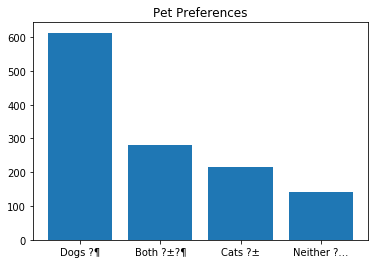

In [31]:
# count how often each pet preference is observed 
petFreqTable = df["Just for fun, do you prefer dogs or cat?"].value_counts()

# get a list of the names
labels = list(petFreqTable.index)

# get a list of the counts
counts = petFreqTable.values

# generate a list of numbers as long as our number of labels
positionsForBars = list(range(len(labels)))

# plot the names and counts to the bar function
plt.bar(positionsForBars, counts) # plot our bars
plt.xticks(positionsForBars, labels) # add lables
plt.title("Pet Preferences")

An alternative is to use the **Seaborn** package to plot our data

Text(0.5,1,'Dogs vs. Cats')

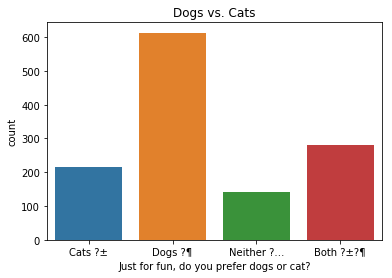

In [32]:
sns.countplot(df["Just for fun, do you prefer dogs or cat?"]).set_title("Dogs vs. Cats")

### Perform a Chi-square Test

Designed to analyze categorical data, it is intended to test how likely it is that an observed distribution is due to chance. It is also called a "goodness of fit" statistic, because it measures how well the observed distribution of data fits with the distribution that is expected if the variables are independent. 

It will not work with parametric or continuous data (such as height in inches). For example, if you want to test whether attending class influences how students perform on an exam, using test scores (from 0-100) as data would not be appropriate for a Chi-square test. However, arranging students into the categories "Pass" and "Fail" would.

Note:  The chisquare function from scipy.stats will only do a one-way comparison.

In [33]:
# first let's do a one-way chi-squared test for stats background
scipy.stats.chisquare(df["Have you ever taken a course in statistics?"].value_counts())

Power_divergenceResult(statistic=108.50120096076861, pvalue=2.7495623442639547e-24)

Statistic here is the chi-square value (larger = more difference from a uniform distrobution) and pvalue is very low here.

In [34]:
# first let's do a one-way chi-squared test for programming background
scipy.stats.chisquare(df["Do you have any previous experience with programming?"].value_counts())

Power_divergenceResult(statistic=906.2001601281024, pvalue=7.55591487886036e-195)

And, again, our p-value is very low. This means that we can be sure, for both these questions, that the people who answered them are not drawn from a pool of people who are uniformly likely to have chosen each answer.

Now let's do a two-way comparison. Is there a relationship between having programming background and having taken statistics?

In [35]:
# now let's do a two-way chi-square test. Is there a relationship between programming background 
# and stats background?
contingencyTable = pd.crosstab(df["Do you have any previous experience with programming?"],
                              df["Have you ever taken a course in statistics?"])

scipy.stats.chi2_contingency(contingencyTable)

(16.827631021435366,
 0.03195483698199162,
 8,
 array([[ 94.48839071, 204.47878303, 162.03282626],
        [  0.40992794,   0.88710969,   0.70296237],
        [ 43.45236189,  94.0336269 ,  74.51401121],
        [108.22097678, 234.19695757, 185.58206565],
        [  9.42834267,  20.40352282,  16.16813451]]))

Here, the first value (16.827) is the  χ2  value, the second value (0.032) is the p-value and the third value (8) is the degrees of freedom. Since our p-value is under our alpha of 0.05, we can say that it seems unlikely that there isn't a connection between these two things, right?

BUT! Becuase we have preformed three tests of statistical significance we need to correct for the fact that the probability that we're going to get a significant effect just by chance increases with each test. (If you set your alpha to 0.05, you'll be wrong just by chance 1/20 times, so if you preform 20 test you're very likely to get the wrong answer on one of them & you need to correct for that.) We can do by dividing our alpha by x, where x is the number of tests we have preformed. So in this case, our p-value would have to be below a value of 0.016 to have an overall alphs of 0.05.

Because we did three tests, this final result is not significant at alpha = 0.05.